In [1]:
%matplotlib inline
import utils; reload(utils)
from utils import *

/Users/edwizzle/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using Theano backend.


In [22]:
%matplotlib inline
from __future__ import division, print_function
import os, json
from glob import glob
import numpy as np
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots, get_batches, plot_confusion_matrix, get_data

In [3]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image


In [5]:
x = random((30,2))
y = np.dot(x, [2., 3.]) + 1.

In [7]:
y

array([ 2.6218,  3.2554,  3.2685,  4.7776,  3.4636,  2.9334,  3.8576,  4.026 ,  3.7252,  2.2991,
        2.6787,  3.798 ,  4.4248,  5.3835,  3.5017,  3.2293,  4.6482,  5.3073,  4.2518,  4.023 ,
        4.8414,  4.5009,  3.9397,  4.383 ,  4.0673,  2.1852,  5.6012,  2.7274,  5.0319,  3.5803])

In [16]:
x[:5]

array([[ 0.755 ,  0.0373],
       [ 0.1309,  0.6646],
       [ 0.7063,  0.2853],
       [ 0.9944,  0.5963],
       [ 0.1961,  0.6905]])

In [17]:
y[:5]

array([ 2.6218,  3.2554,  3.2685,  4.7776,  3.4636])

In [18]:
lm = Sequential([Dense(1, input_shape=(2,)) ])
lm.compile(optimizer=SGD(lr=0.1), loss='mse')

In [20]:
lm.evaluate(x,y, verbose=0)

19.112804412841797

In [21]:
lm.fit(x, y, nb_epoch=5, batch_size=1)

Epoch 1/5
30/30 [==============================] - 0s - loss: 1.4219      
Epoch 2/5
30/30 [==============================] - 0s - loss: 0.1640     
Epoch 3/5
30/30 [==============================] - 0s - loss: 0.1021     
Epoch 4/5
30/30 [==============================] - 0s - loss: 0.0425     
Epoch 5/5
30/30 [==============================] - 0s - loss: 0.0343     


In [22]:
lm.evaluate(x, y, verbose=0)

0.020598439499735832

In [23]:
lm.get_weights()

[array([[ 1.6689],
        [ 2.572 ]], dtype=float32), array([ 1.4778], dtype=float32)]

In [30]:
# path = "data/dogs-vs-cats/"
path = "data/dogs-vs-cats/sample/"
model_path = path + "models/"
if not os.path.exists(model_path): os.mkdir(model_path)

In [48]:
path

'data/dogs-vs-cats/sample/'

In [74]:
% ls

cat.0.jpg      cat.3248.jpg   cat.7749.jpg   dog.12247.jpg  dog.5499.jpg
cat.1.jpg      cat.3249.jpg   cat.775.jpg    dog.12248.jpg  dog.55.jpg
cat.10.jpg     cat.325.jpg    cat.7750.jpg   dog.12249.jpg  dog.550.jpg
cat.100.jpg    cat.3250.jpg   cat.7751.jpg   dog.1225.jpg   dog.5500.jpg
cat.1000.jpg   cat.3251.jpg   cat.7752.jpg   dog.12250.jpg  dog.5501.jpg
cat.10000.jpg  cat.3252.jpg   cat.7753.jpg   dog.12251.jpg  dog.5502.jpg
cat.10001.jpg  cat.3253.jpg   cat.7754.jpg   dog.12252.jpg  dog.5503.jpg
cat.10002.jpg  cat.3254.jpg   cat.7755.jpg   dog.12253.jpg  dog.5504.jpg
cat.10003.jpg  cat.3255.jpg   cat.7756.jpg   dog.12254.jpg  dog.5505.jpg
cat.10004.jpg  cat.3256.jpg   cat.7757.jpg   dog.12255.jpg  dog.5506.jpg
cat.10005.jpg  cat.3257.jpg   cat.7758.jpg   dog.12256.jpg  dog.5507.jpg
cat.10006.jpg  cat.3258.jpg   cat.7759.jpg   dog.12257.jpg  dog.5508.jpg
cat.10007.jpg  cat.3259.jpg   cat.776.jpg    dog.12258.jpg  dog.5509.jpg
cat.10008.jpg  cat.326.jpg    cat.7760.jpg   dog.12259

In [63]:
from shutil import copyfile
train_path = path + "train/"
cats_path = "cats/"
if not os.path.exists(cats_path): os.mkdir(cats_path)

In [67]:
from shutil import copyfile
train_path = path + "train/"
dogs_path = "dogs/"
if not os.path.exists(dogs_path): os.mkdir(dogs_path)

In [83]:
% ls ../sample/train/dogs/ 

dog.10012.jpg  dog.12336.jpg  dog.3706.jpg   dog.5697.jpg   dog.7640.jpg
dog.10290.jpg  dog.12369.jpg  dog.3777.jpg   dog.5717.jpg   dog.7743.jpg
dog.10364.jpg  dog.12488.jpg  dog.3781.jpg   dog.5791.jpg   dog.7883.jpg
dog.10381.jpg  dog.1261.jpg   dog.3789.jpg   dog.5818.jpg   dog.7972.jpg
dog.10383.jpg  dog.1301.jpg   dog.3823.jpg   dog.5924.jpg   dog.8050.jpg
dog.10386.jpg  dog.1333.jpg   dog.383.jpg    dog.6047.jpg   dog.8077.jpg
dog.10423.jpg  dog.1354.jpg   dog.39.jpg     dog.605.jpg    dog.8078.jpg
dog.10456.jpg  dog.1398.jpg   dog.3947.jpg   dog.6092.jpg   dog.8169.jpg
dog.10495.jpg  dog.1432.jpg   dog.3959.jpg   dog.6104.jpg   dog.8170.jpg
dog.10545.jpg  dog.1607.jpg   dog.4008.jpg   dog.6140.jpg   dog.8195.jpg
dog.10596.jpg  dog.1627.jpg   dog.4052.jpg   dog.6388.jpg   dog.8261.jpg
dog.10612.jpg  dog.1639.jpg   dog.4058.jpg   dog.6448.jpg   dog.8297.jpg
dog.10618.jpg  dog.1649.jpg   dog.4086.jpg   dog.6474.jpg   dog.8314.jpg
dog.10773.jpg  dog.1654.jpg   dog.4154.jpg   dog.65

In [104]:
g = glob('cat*.jpg')
shut = np.random.permutation(g)
for i in range(20): copyfile(shut[i], "../sample/valid/cats/" + shut[i])

IOError: [Errno 2] No such file or directory: '../sample/valid/cats/cat.4601.jpg'

In [108]:
g = glob('cat*.jpg')
shut = np.random.permutation(g)
for i in range(20): copyfile(shut[i], "../sample/valid/cats/" + shut[i])

In [41]:
batch_size = 100

In [4]:
from vgg16 import Vgg16
vgg = Vgg16()
model = vgg.model

/Users/edwizzle/anaconda/lib/python2.7/site-packages/keras/layers/core.py:621: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [90]:
path + 'train'

'data/dogs-vs-cats/sample/train'

In [5]:
path = '/Users/edwizzle/Developer/FastAI/assignments/data/dogs-vs-cats/sample/train'

In [6]:
valid_path = '/Users/edwizzle/Developer/FastAI/assignments/data/dogs-vs-cats/sample/valid'

In [7]:
val_batches = get_batches(valid_path, shuffle=False, batch_size=1)

Found 40 images belonging to 2 classes.


In [8]:
batches = get_batches(path, shuffle=False, batch_size=1)

Found 400 images belonging to 2 classes.


In [93]:
pwd

u'/Users/edwizzle/Developer/FastAI/assignments/data/dogs-vs-cats/train'

In [99]:
valid_path

'/Users/edwizzle/Developer/FastAI/assignments/data/dogs-vs-cats/sample/valid'

In [106]:
if not os.path.exists(valid_path+"dogs/"): os.mkdir(valid_path + "/cats")

In [11]:
import bcolz
def save_array(fname, arr): c=bcolz.carray(arr, rootdir=fname, mode='w'); c.flush()
def load_array(fname): return bcolz.open(fname)[:]

In [12]:
?? bcolz

In [20]:
?? get_data

In [23]:
val_data = get_data(val_batches)

In [24]:
val_data

array([[[[ 224.,  223.,  223., ...,  232.,  238.,  245.],
         [ 220.,  221.,  222., ...,  237.,  238.,  248.],
         [ 218.,  219.,  221., ...,  237.,  235.,  239.],
         ..., 
         [ 216.,  214.,  210., ...,  215.,  216.,  217.],
         [ 221.,  219.,  214., ...,  215.,  216.,  217.],
         [ 211.,  213.,  206., ...,  214.,  216.,  217.]],

        [[ 225.,  224.,  224., ...,  233.,  239.,  242.],
         [ 221.,  222.,  223., ...,  238.,  239.,  247.],
         [ 219.,  220.,  222., ...,  238.,  236.,  242.],
         ..., 
         [ 213.,  211.,  209., ...,  212.,  213.,  212.],
         [ 213.,  212.,  209., ...,  212.,  213.,  212.],
         [ 215.,  217.,  211., ...,  211.,  213.,  211.]],

        [[ 220.,  219.,  219., ...,  238.,  244.,  249.],
         [ 216.,  217.,  218., ...,  243.,  244.,  253.],
         [ 214.,  215.,  217., ...,  243.,  241.,  247.],
         ..., 
         [ 222.,  218.,  214., ...,  207.,  208.,  209.],
         [ 224.,  220.,

In [25]:
trn_data = get_data(batches)

In [27]:
trn_data = get_data(batches)

In [28]:
trn_data.shape

(400, 3, 224, 224)

In [31]:
model_path

'data/dogs-vs-cats/sample/models/'

In [32]:
save_array(model_path + 'train_data.bc', trn_data)

In [33]:
save_array(model_path + 'valid_data.bc', val_data)

In [34]:
trn_data = load_array(model_path + 'train_data.bc')

In [35]:
val_data = load_array(model_path + 'valid_data.bc')

In [36]:
val_data.shape

(40, 3, 224, 224)

In [37]:
def onehot(x): return np.array(OneHotEncoder().fit_transform(x.reshape(-1,1)).todense())

In [40]:
val_classes = val_batches.classes
trn_classes = batches.classes
val_labels = onehot(val_classes)
trn_labels = onehot(trn_classes)

In [43]:
trn_labels.shape

(400, 2)

In [44]:
trn_classes[:4]

array([0, 0, 0, 0], dtype=int32)

In [45]:
trn_labels[:4]

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [48]:
batch_size = 100

In [49]:
trn_features = model.predict(trn_data, batch_size=batch_size)
val_features = model.predict(val_data, batch_size=batch_size)


In [50]:
trn_features.shape

(400, 1000)

In [51]:
save_array(model_path + 'train_lastlayer_features.bc', trn_features)
save_array(model_path + 'valid_lastlayer_features.bc', val_features)


In [52]:
trn_features = load_array(model_path + 'train_lastlayer_features.bc')
val_features = load_array(model_path + 'train_lastlayer_features.bc')


In [53]:
trn_features.shape

(400, 1000)

In [54]:
?? Sequential

In [55]:
?? Dense

In [60]:
lm = Sequential([Dense(2, activation='softmax', input_shape=(1000,))])
lm.compile(optimizer=RMSprop(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
lm.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_input_1 (InputLayer)       (None, 1000)          0                                            
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 2)             2002        dense_input_1[0][0]              
Total params: 2,002
Trainable params: 2,002
Non-trainable params: 0
____________________________________________________________________________________________________


In [65]:
batch_size = 64

In [67]:
batch_size = 4

In [77]:
len(trn_labels)

400

In [78]:
val_classes = val_batches.classes

In [83]:
batch_size = 100

In [84]:
val_features = model.predict(val_data, batch_size=batch_size)

In [86]:
save_array(model_path + 'valid_lastlayer_features.bc', val_features)

In [87]:
batch_size = 4

In [88]:
lm.fit(trn_features, trn_labels, nb_epoch=3, batch_size=batch_size,
      validation_data=(val_features, val_labels))

Train on 400 samples, validate on 40 samples
Epoch 1/3
400/400 [==============================] - 0s - loss: 0.1565 - acc: 0.9550 - val_loss: 0.1876 - val_acc: 0.9250
Epoch 2/3
400/400 [==============================] - 0s - loss: 0.0669 - acc: 0.9750 - val_loss: 0.2054 - val_acc: 0.9500
Epoch 3/3
400/400 [==============================] - 0s - loss: 0.0453 - acc: 0.9800 - val_loss: 0.2802 - val_acc: 0.9250


In [89]:
lm.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_5 (Dense)                  (None, 2)             2002        dense_input_1[0][0]              
Total params: 2,002
Trainable params: 2,002
Non-trainable params: 0
____________________________________________________________________________________________________


In [91]:
?? lm.fit

In [92]:
preds = lm.predict_classes(val_features, batch_size=batch_size)

 4/40 [==>...........................] - ETA: 0s

In [93]:
probs = lm.predict_proba(val_features, batch_size=batch_size)[:,0]

 4/40 [==>...........................] - ETA: 0s

In [94]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1])

In [95]:
probs

array([  1.0000e+00,   1.0000e+00,   9.9987e-01,   9.6804e-01,   9.9999e-01,   9.1231e-01,
         9.9258e-01,   9.2032e-01,   1.0000e+00,   1.0000e+00,   1.0000e+00,   9.9999e-01,
         1.0000e+00,   1.0000e+00,   9.9999e-01,   1.0000e+00,   1.0000e+00,   1.0000e+00,
         9.9992e-01,   1.0000e+00,   3.5286e-05,   3.1097e-04,   2.2472e-03,   1.1129e-01,
         5.7528e-04,   1.6358e-05,   1.4406e-05,   3.0001e-04,   2.2984e-04,   9.9190e-01,
         6.3791e-01,   1.0777e-04,   2.7095e-02,   1.7629e-04,   1.4844e-05,   3.4500e-04,
         1.9886e-06,   9.9332e-01,   2.4169e-05,   5.3520e-04], dtype=float32)

In [97]:
filenames = val_batches.filenames

In [98]:
filenames

['cats/cat.100.jpg',
 'cats/cat.10046.jpg',
 'cats/cat.10543.jpg',
 'cats/cat.10754.jpg',
 'cats/cat.10970.jpg',
 'cats/cat.11231.jpg',
 'cats/cat.12247.jpg',
 'cats/cat.1340.jpg',
 'cats/cat.1348.jpg',
 'cats/cat.1663.jpg',
 'cats/cat.1725.jpg',
 'cats/cat.2794.jpg',
 'cats/cat.440.jpg',
 'cats/cat.5117.jpg',
 'cats/cat.5816.jpg',
 'cats/cat.5949.jpg',
 'cats/cat.6531.jpg',
 'cats/cat.7112.jpg',
 'cats/cat.7349.jpg',
 'cats/cat.9450.jpg',
 'dogs/dog.10923.jpg',
 'dogs/dog.11041.jpg',
 'dogs/dog.11138.jpg',
 'dogs/dog.11173.jpg',
 'dogs/dog.12005.jpg',
 'dogs/dog.12162.jpg',
 'dogs/dog.1722.jpg',
 'dogs/dog.2213.jpg',
 'dogs/dog.3602.jpg',
 'dogs/dog.3805.jpg',
 'dogs/dog.3923.jpg',
 'dogs/dog.5026.jpg',
 'dogs/dog.5547.jpg',
 'dogs/dog.5709.jpg',
 'dogs/dog.6441.jpg',
 'dogs/dog.7057.jpg',
 'dogs/dog.7238.jpg',
 'dogs/dog.8307.jpg',
 'dogs/dog.8852.jpg',
 'dogs/dog.9086.jpg']

In [99]:
n_view = 4

In [102]:
def plots_idx(idx, titles=None):
    plots([image.load_img(path + 'valid/' + filenames[i]) for i in idx], 
          titles=titles)

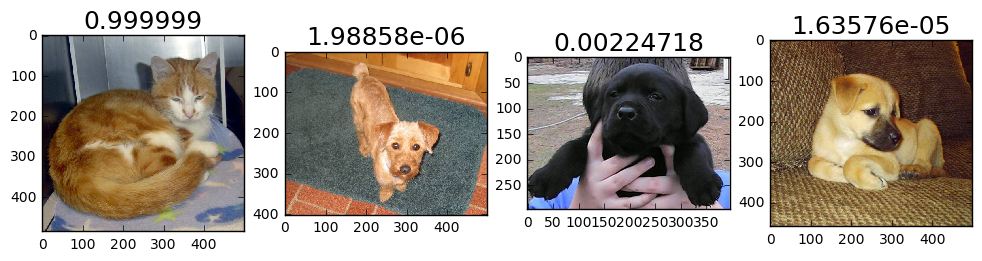

In [103]:
correct = np.where(preds==val_labels[:,1])[0]
idx = permutation(correct)[:n_view]
plots_idx(idx, probs[idx])

In [104]:
correct

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 38, 39])

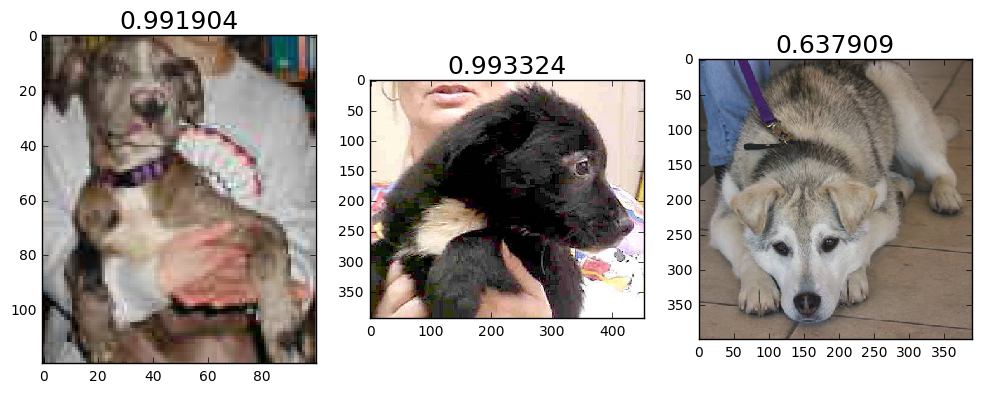

In [105]:
incorrect = np.where(preds != val_labels[:,1])[0]
idx = permutation(incorrect)[:n_view]
plots_idx(idx, probs[idx])

In [106]:
incorrect

array([29, 30, 37])

In [110]:
filenames[28], preds[28]

('dogs/dog.3602.jpg', 1)

In [111]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1])

In [112]:
filenames[0]

'cats/cat.100.jpg'

In [113]:
filenames[20]

'dogs/dog.10923.jpg'

In [114]:
preds[20]

1

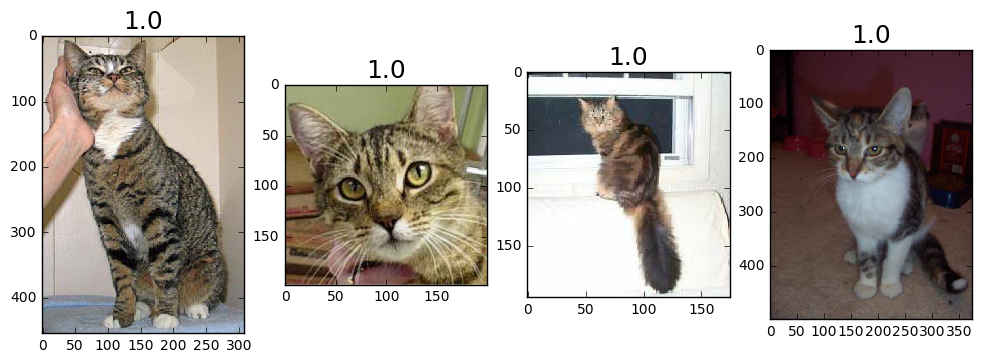

In [116]:
correct_cats = np.where((preds==0) & (preds == val_labels[:,1]))[0]
most_correct_cats = np.argsort(probs[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], probs[correct_cats][most_correct_cats])

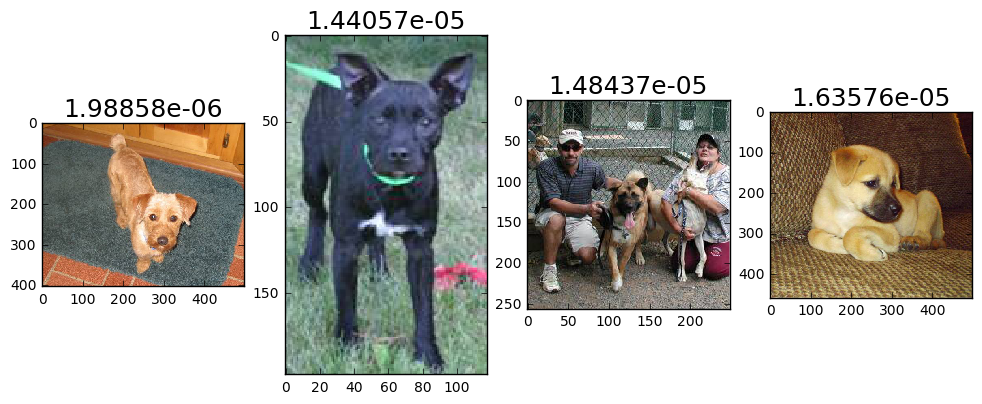

In [117]:
correct_dogs = np.where((preds==1) & (preds == val_labels[:,1]))[0]
most_correct_dogs = np.argsort(probs[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], probs[correct_dogs][most_correct_dogs])

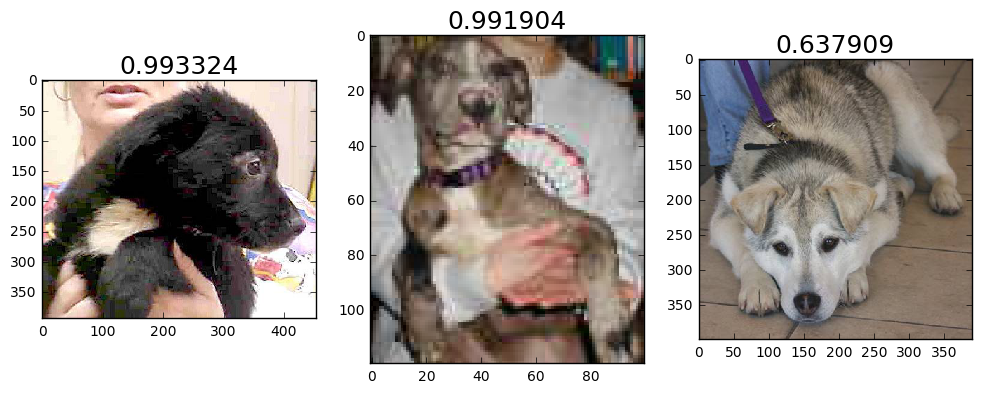

In [125]:
incorrect_cats = np.where((preds==0) & (preds != val_labels[:,1]))[0]
most_incorrect_cats = np.argsort(probs[incorrect_cats])[::-1][:n_view]
plots_idx(incorrect_cats[most_incorrect_cats], probs[incorrect_cats][most_incorrect_cats])

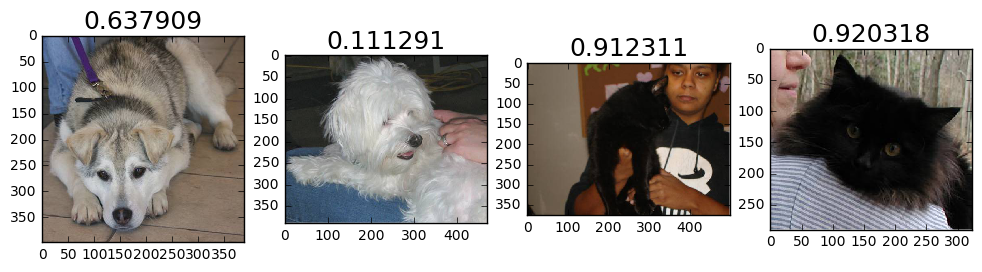

In [127]:
most_uncertain = np.argsort(np.abs(probs-0.5))
plots_idx(most_uncertain[:n_view], probs[most_uncertain])

In [128]:
cm = confusion_matrix(val_classes, preds)

In [129]:
cm

array([[20,  0],
       [ 3, 17]])

[[20  0]
 [ 3 17]]


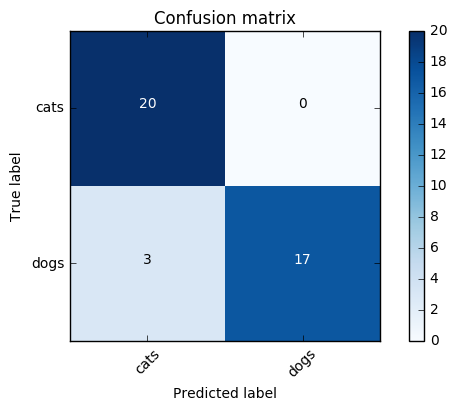

In [130]:
plot_confusion_matrix(cm, val_batches.class_indices)

In [131]:
lm = Sequential([Dense(2, activation='softmax', input_shape=(1000,))])

In [132]:
lm

In [133]:
model.add(Dense(4096, activation='relu'))

In [134]:
vgg.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [135]:
model.pop()
for layer in model.layers: layer.trainable=False

In [136]:
model.add(Dense(2, activation='softmax'))

In [137]:
?? vgg.finetune

In [145]:
gen = image.ImageDataGenerator()
batches = gen.flow(trn_data, trn_labels, batch_size=batch_size, shuffle=True)
val_batches = gen.flow(val_data, val_labels, batch_size=batch_size, shuffle=False)


In [139]:
?? image.ImageDataGenerator()

In [148]:
def fit_model(model, batches, val_batches, nb_epoch):
    model.fit_generator(batches, samples_per_epoch=batches.n, nb_epoch=nb_epoch,
                       validation_data=val_batches, nb_val_samples=val_batches.n)

In [149]:
opt = RMSprop(lr=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [150]:
fit_model(model, batches, val_batches, nb_epoch=2)

Epoch 1/2
400/400 [==============================] - 154s - loss: 0.1902 - acc: 0.9350 - val_loss: 0.1218 - val_acc: 0.9500
Epoch 2/2
400/400 [==============================] - 155s - loss: 0.0808 - acc: 0.9675 - val_loss: 0.1503 - val_acc: 0.9500


In [151]:
model.save_weights(model_path + 'finetune1.h5')

In [152]:
model.load_weights(model_path + 'finetune1.h5')

In [153]:
preds = model.predict_classes(val_data, batch_size=batch_size)
probs = model.predict_proba(val_data, batch_size=batch_size)[:,0]
probs[:8]

40/40 [==============================] - 12s    


array([ 0.9998,  0.9999,  0.9987,  0.8894,  0.9992,  0.6724,  0.9766,  0.78  ], dtype=float32)

In [154]:
cm = confusion_matrix(val_classes, preds)

In [155]:
cm

array([[20,  0],
       [ 2, 18]])

In [156]:
?? plot_confusion_matrix

[[20  0]
 [ 2 18]]


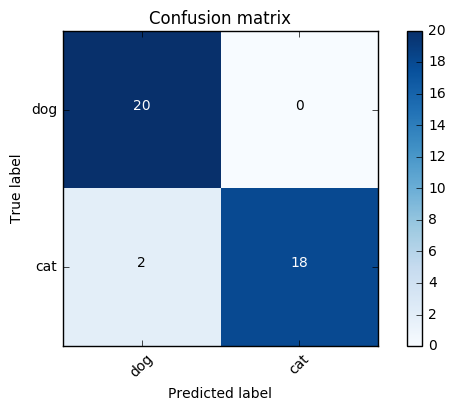

In [157]:
plot_confusion_matrix(cm, {'cat': 0, 'dog':1})

In [158]:
import sympy as sp
x = sp.var('x')
pow(2*x, 2).diff()

8*x

In [159]:
layers = model.layers

In [165]:
first_dense_idx = [index for index, layer in enumerate(layers) if type(layer) is Dense][0]
for layer in layers[first_dense_idx:]: layer.trainable = True

In [167]:
K.set_value(opt.lr, 0.01)
fit_model(model, batches, val_batches, 3)

Epoch 1/3
400/400 [==============================] - 150s - loss: 0.0568 - acc: 0.9725 - val_loss: 0.1603 - val_acc: 0.9500
Epoch 2/3
400/400 [==============================] - 149s - loss: 0.0482 - acc: 0.9800 - val_loss: 0.1676 - val_acc: 0.9250
Epoch 3/3
400/400 [==============================] - 152s - loss: 0.0574 - acc: 0.9725 - val_loss: 0.1781 - val_acc: 0.9250


In [168]:
model.save_weights(model_path + 'finetune2.h5')

In [170]:
for layer in layers[12:]: layer.trainable = True
K.set_value(opt.lr, 0.001)    

In [171]:
fit_model(model, batches, val_batches, 4)

Epoch 1/4
400/400 [==============================] - 154s - loss: 0.0571 - acc: 0.9800 - val_loss: 0.1783 - val_acc: 0.9250
Epoch 2/4
400/400 [==============================] - 158s - loss: 0.0421 - acc: 0.9825 - val_loss: 0.1791 - val_acc: 0.9250
Epoch 3/4
400/400 [==============================] - 156s - loss: 0.0527 - acc: 0.9725 - val_loss: 0.1799 - val_acc: 0.9250
Epoch 4/4
400/400 [==============================] - 155s - loss: 0.0414 - acc: 0.9825 - val_loss: 0.1805 - val_acc: 0.9250


In [172]:
model.save_weights(model_path + 'finetune3.h5')

In [182]:
model.load_weights(model_path + 'finetune2.h5')
model.evaluate_generator(get_batches(path+'valid', gen, False, batch_size*2), val_batches.n)

Found 40 images belonging to 2 classes.


[0.17807335216493811, 0.92500000000000004]